In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import rfft, rfftfreq
from scipy.fft import rfft, rfftfreq
from scipy import signal
import cmath

In [2]:
plt.rcParams["figure.figsize"] = (15, 5)

In [3]:
def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi для преобразования в радианы
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Генерируем волну с частотой 2 Гц, которая длится 5 секунд
# x, y = generate_sine_wave(2, 1000, 1)
# plt.plot(x, y)
# plt.show()

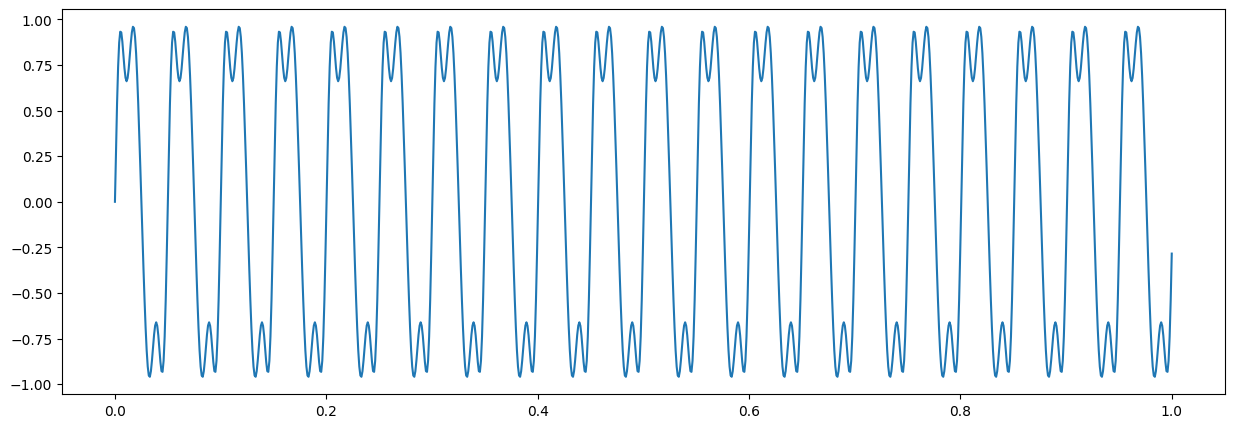

In [4]:
SAMPLE_RATE = 1000
DURATION = 1
N = SAMPLE_RATE * DURATION

_, nice_tone = generate_sine_wave(20, SAMPLE_RATE, DURATION)
_, noise_tone1 = generate_sine_wave(80, SAMPLE_RATE, DURATION)
_, noise_tone2 = generate_sine_wave(60, SAMPLE_RATE, DURATION)

noise_tone = 0.1 * noise_tone1 + 0.3 * noise_tone2
mixed_tone = 1 * nice_tone + noise_tone

plt.plot(np.linspace(0, DURATION, N), mixed_tone)
plt.show()

In [5]:
def TransformFrequency(w):
    return np.tan(np.pi * w / SAMPLE_RATE)

In [6]:
def AFH_H(w, cutoff, n=2):
    return 1 / np.sqrt(1 + (w / cutoff) ** (2 * n))

# cutoff задает частоту среза фильтра Баттерворта

In [7]:
cutoff = 25

In [8]:
w = TransformFrequency(cutoff)

a0 = 1 + np.sqrt(2) * w + w * w

a1 = -2 + 2 * w * w
a1 /= a0

a2 = 1 - np.sqrt(2) * w + w * w
a2 /= a0

b0 = w * w
b0 /= a0

b1 = 2 * w * w
b1 /= a0

b2 = w * w
b2 /= a0

print(a1, a2, b0, b1, b2)

-1.7786317778245848 0.8008026466657076 0.005542717210280682 0.011085434420561363 0.005542717210280682


In [9]:
def processingOfSignal(input):

    output = np.zeros_like(input)
    _x = np.array(input[:3])
    _y = np.zeros(3)

    for i, x in enumerate(input[2:]):
        _x[2] = x

        # convolution
        _y[2] = b0 * _x[2] + b1 * _x[1] + b2 * _x[0] - a1 * _y[1] - a2 * _y[0]
        output[i] = _y[2]

        # shifting
        _x = np.roll(_x, -1)
        _y = np.roll(_y, -1)


    return output

In [10]:
yf = rfft(mixed_tone)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

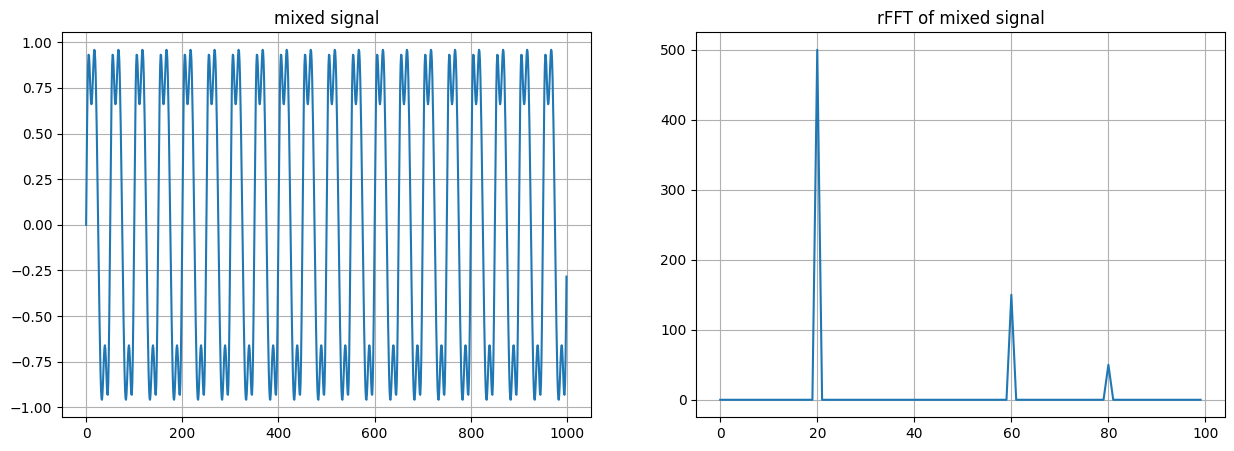

In [11]:
plt.subplot(1, 2, 1)
plt.plot(mixed_tone)
plt.grid()
plt.title("mixed signal")

bound = 100
plt.subplot(1, 2, 2)
plt.plot(xf[:bound], np.abs(yf[:bound]))
plt.grid()
plt.title("rFFT of mixed signal")

plt.show()

In [12]:
output = processingOfSignal(mixed_tone)
yf = rfft(output)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

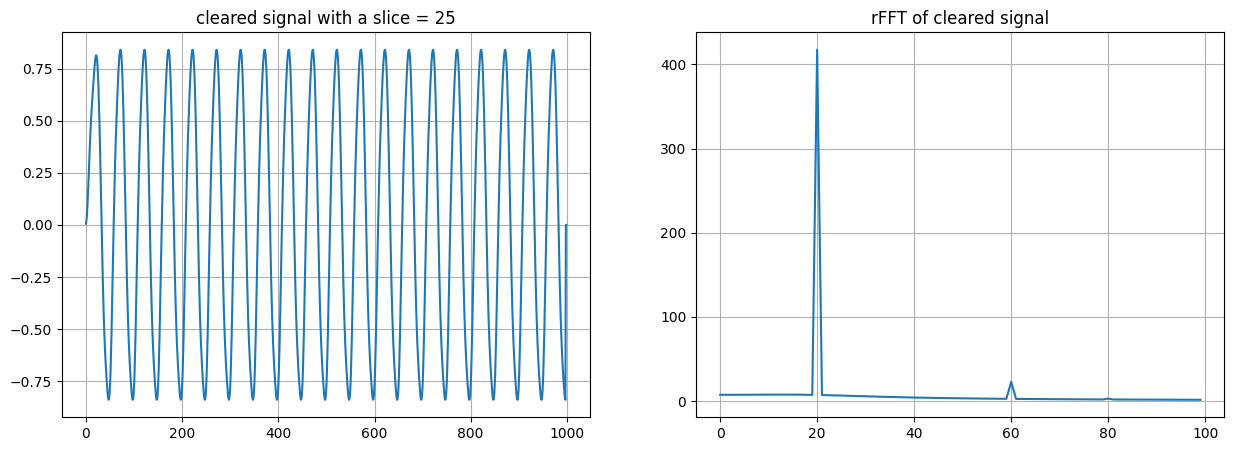

In [13]:
plt.subplot(1, 2, 1)
plt.plot(output)
plt.grid()
plt.title(f"cleared signal with a slice = {cutoff}")

bound = 100
plt.subplot(1, 2, 2)
plt.plot(xf[:bound], np.abs(yf[:bound]))
plt.grid()
plt.title("rFFT of cleared signal")

plt.show()

# АЧХ аналоговой функции Баттерворта с указанием порядка и частоты среза
# АФХ аналоговой функции Баттерворта

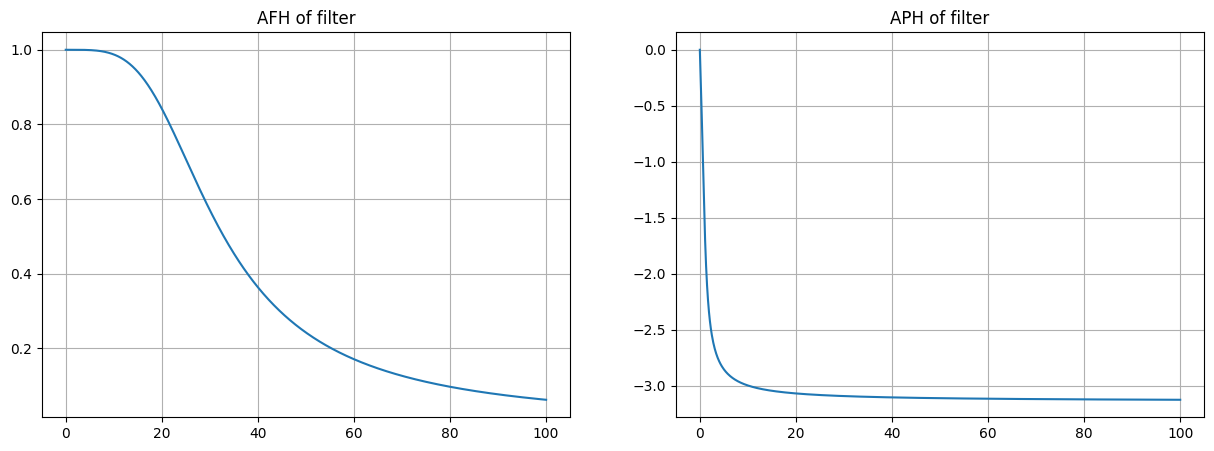

In [14]:
w = np.linspace(0, 100, 1000)

plt.subplot(1, 2 ,1)
plt.plot(w, AFH_H(w, cutoff, 2))
plt.grid()
plt.title("AFH of filter")

plt.subplot(1, 2 ,2)
H_jw = 1 / (-w ** 2 + np.sqrt(2) * w * 1j + 1)
plt.plot(w, [cmath.phase(i) for i in H_jw])
plt.grid()
plt.title("APH of filter")

plt.show()

# Видим что питоновская функция выдает такой же АЧХ, только не смещенный относительно частоты среза

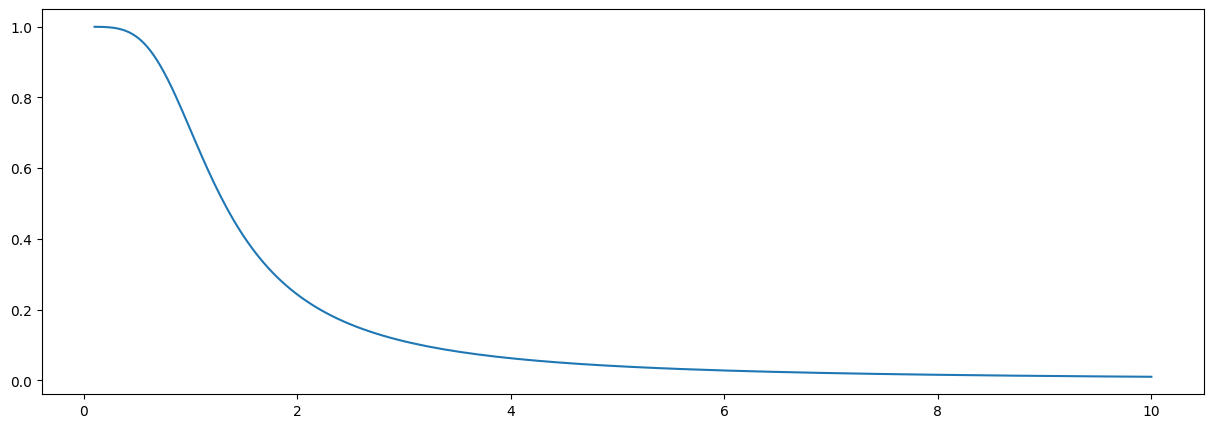

In [15]:
system = ([1.0], [1.0, np.sqrt(2.0), 1.0])
t, y = signal.impulse2(system)

plt.plot(*np.abs(signal.freqs(*system)))